<a href="https://colab.research.google.com/github/girinath18/aadhaar-cardDetection/blob/master/Aadhaar_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
#configurating the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d girinathrs211555/aadhaar-datasets

Dataset URL: https://www.kaggle.com/datasets/girinathrs211555/aadhaar-datasets
License(s): unknown
aadhaar-datasets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extrcing the compossed Dataset
from zipfile import ZipFile
dataset = '/content/aadhaar-datasets.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
Aadhaar_card_files = os.listdir('/content/AADHAAR_CARD_DETECTION/Aadhaar_card')
print(Aadhaar_card_files[0:5])

print(Aadhaar_card_files[-5:])

['BATS (272).png', 'BATS (62).jpeg', 'BATS (360).png', 'BATS (401).jpg', 'BATS (200).png']
['BATS (207).png', 'BATS (689).png', 'BATS (670).png', 'BATS (240).jpg', 'BATS (517).png']


In [7]:
Non_aadhaar_card_files = os.listdir('/content/AADHAAR_CARD_DETECTION/Not_Aadhaar_card')
print(Non_aadhaar_card_files[0:5])

print(Non_aadhaar_card_files[-5:])

['JOKES (312).jpeg', 'JOKES (210).jpeg', 'JOKES (371).jpeg', 'JOKES (794).jpeg', 'JOKES (59).jpeg']
['JOKES (586).jpeg', 'JOKES (88).jpeg', 'JOKES (398).jpeg', 'JOKES (652).jpeg', 'JOKES (439).jpg']


In [8]:
print('Number of with Aadhaar_card_files:', len(Aadhaar_card_files))
print('Number of without Non_aadhaar_card_files:', len(Non_aadhaar_card_files))

Number of with Aadhaar_card_files: 1500
Number of without Non_aadhaar_card_files: 1500


In [9]:
#create the labels

Aadhaar_card_labels = [1]*1500

Non_aadhaar_card_labels = [0]*1500

In [10]:
# Checking wheather the labels are created as expected
print(Aadhaar_card_labels[0:5])

print(Non_aadhaar_card_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [11]:
# I am Concanating  the  two class as labels

labels = Aadhaar_card_labels + Non_aadhaar_card_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

3000
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
# Convert images to numpy arrays

Aadhaar_card__path = '/content/AADHAAR_CARD_DETECTION/Aadhaar_card/'

data = []
for img_file in Aadhaar_card_files:

  image = Image.open(Aadhaar_card__path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

Non_aadhaar_card_path = '/content/AADHAAR_CARD_DETECTION/Not_Aadhaar_card/'

for img_file in Non_aadhaar_card_files:

  image = Image.open(Non_aadhaar_card_path + img_file)
  image = image.resize((128,128))
  image = image.convert("RGB")
  image = np.array(image)
  data.append(image)

In [13]:
# Coverting image list and the label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [14]:
type(X)

numpy.ndarray

In [15]:
type(Y)

numpy.ndarray

In [16]:
print(X.shape)
print(Y.shape)

(3000, 128, 128, 3)
(3000,)


In [17]:
print(Y)

[1 1 1 ... 0 0 0]


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [19]:
#Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [20]:
import tensorflow as tf
from tensorflow import keras

In [21]:
import tensorflow as tf
from tensorflow import keras

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(300, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(600, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(800, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [23]:
# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_scaled, Y_train, validation_split=0.2, epochs=50)


Epoch 1/50
60/60 [==============================] - 34s 250ms/step - loss: 0.7956 - acc: 0.6146 - val_loss: 0.4503 - val_acc: 0.8062
Epoch 2/50
60/60 [==============================] - 14s 242ms/step - loss: 0.5407 - acc: 0.7109 - val_loss: 0.2945 - val_acc: 0.8146
Epoch 3/50
60/60 [==============================] - 15s 250ms/step - loss: 0.1298 - acc: 0.9448 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 4/50
60/60 [==============================] - 15s 251ms/step - loss: 0.0216 - acc: 0.9927 - val_loss: 1.8565e-05 - val_acc: 1.0000
Epoch 5/50
60/60 [==============================] - 14s 241ms/step - loss: 0.0426 - acc: 0.9937 - val_loss: 0.4190 - val_acc: 0.9104
Epoch 6/50
60/60 [==============================] - 14s 240ms/step - loss: 0.1377 - acc: 0.9719 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 7/50
60/60 [==============================] - 15s 244ms/step - loss: 0.0286 - acc: 0.9917 - val_loss: 2.1358e-08 - val_acc: 1.0000
Epoch 8/50
60/60 [==============================] - 15s 245ms

In [24]:
# Adjust the learning rate
adam_optimizer = keras.optimizers.Adam(learning_rate=0.0001)

In [25]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy=', accuracy)

19/19 [==============================] - 4s 229ms/step - loss: 0.0000e+00 - acc: 1.0000
Test Accuracy= 1.0


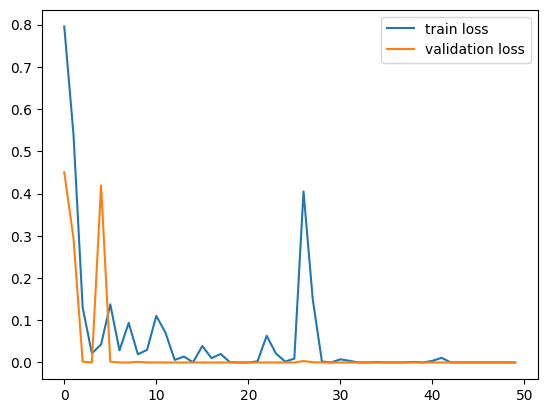

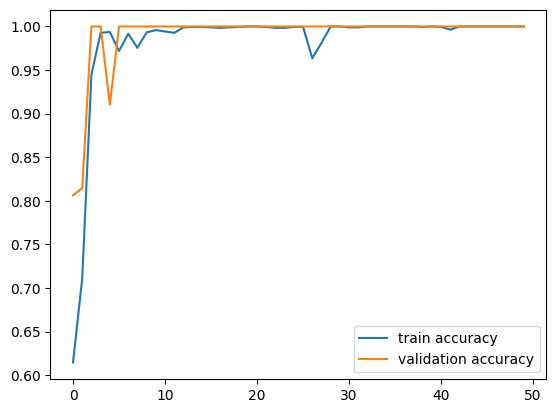

In [26]:
# Plot the training history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [27]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128, 128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:

  print('This is an aadhaar card')

else:

  print('This not an aadhaar card')

KeyboardInterrupt: Interrupted by user

In [ ]:
#model.save('Arabic.h5')